# ANN: HW5-RNN EX3

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# Split the first 19 rows of each picture as X (input timestep) and the 20th row as the prediction (y)
X_seq, y_seq = list(), list()
for i in range(X_train.shape[0]):
    X_seq.append(X_train[i, :20, :])
    y_seq.append(X_train[i, 20, :])
                 

In [5]:
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [6]:
X_seq.shape

(60000, 20, 28)

In [7]:
y_seq.shape

(60000, 28)

In [8]:
# Normalize the dataset
X_seq = X_seq / 255
y_seq = y_seq / 255

In [9]:
# Zero Centering
X_seq = X_seq - .5
y_seq = y_seq - .5

In [10]:
import keras
keras.backend.clear_session()

Using TensorFlow backend.


In [11]:
# define model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(20, 28)))
model.add(Dense(28))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                23808     
_________________________________________________________________
dense (Dense)                (None, 28)                1820      
Total params: 25,628
Trainable params: 25,628
Non-trainable params: 0
_________________________________________________________________


In [12]:
# fit model
model.fit(X_seq, y_seq, epochs=12)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0299 - acc: 0.3707
Epoch 2/12
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0203 - acc: 0.4148
Epoch 3/12
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0183 - acc: 0.4211
Epoch 4/12
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0170 - acc: 0.4263
Epoch 5/12
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0162 - acc: 0.4319
Epoch 6/12
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0155 - acc: 0.43390s - loss: 0.0155 
Epoch 7/12
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0151 - acc: 0.4378
Epoch 8/12
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0147 - acc: 0.4385
Epoch 9/12
60000/60000 [=========================

In [13]:
# Save Model
model.save("Mnist_LSTM.h5")

In [8]:
from tensorflow.keras.models import load_model
# load model
model = load_model('Mnist_LSTM.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
from PIL import Image
# Load the sample damaged image
im = Image.open("damaged.bmp")
# Resize the image as Mnist images size
im = im.resize((28, 28))

# Alternatively, any other image from Mnist test images (X_test) could be loaded and damaged on porpose as a test
# im = X_test[200]
# im[20,:] = np.zeros(28)

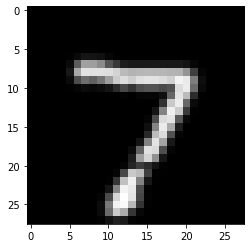

In [19]:
import matplotlib.pyplot as plt
plt.imshow(im, cmap='gray')

In [20]:
# Convet the image to numpy array
im = np.array(im)
im.shape

(28, 28)

In [21]:
# Pick the first 20 rows of the damaged image as the test sequence to be fed to the model
test_img = im[:20,:]

# Normalize the test sequence
test_img = test_img / 255
# Zero Centering
test_img = test_img - .5

# Resize the test sequence to match the input shape of the model
test_img = np.resize(test_img,(1, test_img.shape[0], test_img.shape[1]))
test_img.shape

(1, 20, 28)

In [22]:
# Feed the test sequence to the model in order to predict the output sequence (damaged row of the image)
yhat = model.predict(test_img, verbose=0)

# Since the input sequence was normalized and zero-centered,  
# the reverse action has to be taken, such that the predicted row is prepared to be used in the image
yhat = yhat + .5
yhat = yhat * 255

# Since the prediction is an approximation of the missing row, it has to be modified for impermissible values,
# such that values less than 0 are rounded up to 0, and values greater than 255 are rounded down to 255
yhat = np.where(yhat > 0.0, yhat , 0)
yhat = np.where(yhat > 255.0, 255.0 , yhat)

yhat

array([[  0.4474412 ,   0.3021674 ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   2.6972775 ,   1.2993023 ,
         18.854748  , 102.0783    , 195.19188   , 184.09962   ,
         66.79467   ,   5.3444815 ,   8.119306  ,   3.171781  ,
          0.        ,   3.9834478 ,   6.229766  ,   0.46333194,
          0.37410513,   0.6466645 ,   0.        ,   0.49473345]],
      dtype=float32)

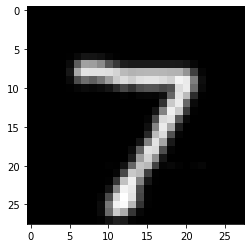

In [23]:
# Now insert the predicted missing row in appropriate row of the damaged image
im[20, :] = yhat

# Plot the recovered image
plt.imshow(im, cmap='gray')

In [24]:
# Convert the numpy array to image
im = Image.fromarray(im)
# Resize the recovered image to more clearly diplayed
im = im.resize((140, 140))
# Save the image
im.save('Recovered_img.bmp')